`Pair Programming Limpieza III valores extremos `

Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
¿Sobre qué columnas podremos eliminar o reemplazar los outliers?
Identifica visualmente los outliers

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
import regex as re

df=pd.read_csv('../Datos/attacks_limpieza_II.csv')
df.head(2)

,case_number,year,type,country,area,location,activity,name,time,species,siglo,species_,injury,mes,fatal_bien,genero_bien,categorias_tiburones,edades
0,2018.06.25,2018,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,18h00,White shark,siglo - XXI,NaN,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White,57.0
1,2018.06.03.a,2018,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,Late afternoon,Tiger shark,siglo - XXI,NaN,FATAL,Jun,Y,M,Tiger,18.0


In [19]:
numericas = df.select_dtypes(np.number)

In [20]:
numericas.columns

Index(['year', 'edades'], dtype='object')

Identifica sobre el dataframe las filas que son outliers

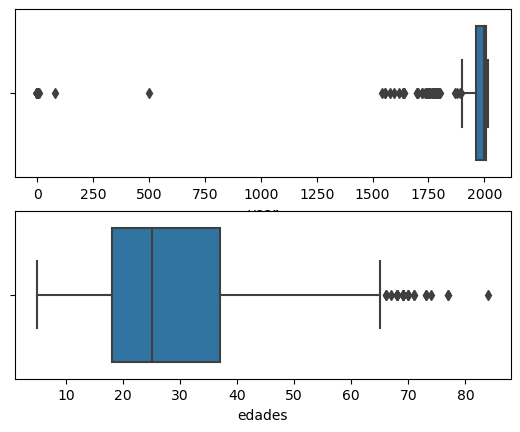

In [21]:
fig, axes = plt.subplots(2,1)
for i in range(len(numericas.columns)):
    sns.boxplot(x= df[numericas.columns[i]], data= df, ax= axes[i]);
plt.show()

Reemplaza los outliers por el estadístico más correcto.

In [22]:
Q1 = np.nanpercentile(df['year'], 25)
Q1

1964.0

In [23]:
Q3 = np.nanpercentile(df['year'], 75)
Q3

2008.0

In [24]:
#calculamos el IQR
IQR = Q3 - Q1
IQR

44.0

In [25]:
outlier_step = 1.5 * IQR
outlier_step

66.0

In [26]:
outliers_data = df[(df["year"] < Q1 - outlier_step) | (df["year"] > Q3 + outlier_step)]

In [27]:
outliers_data

,case_number,year,type,country,area,location,activity,name,time,species,siglo,species_,injury,mes,fatal_bien,genero_bien,categorias_tiburones,edades
1498,1894.11.28,1894,Unprovoked,australia,New South Wales,Newcastle,Bathing,Horace Hewison,Morning,10' to 12' shark,siglo-XX,NaN,"""Lost his arm""",Nov,N,M,NaN,19.0
1499,1892.03.02,1892,Provoked,australia,New South Wales,Lake Macquarie,Fishing,Christopher Wang,Night,12' shark,siglo-XX,NaN,Lacerations to calf by netted shark PROVOKED I...,Mar,N,M,NaN,21.0
1500,1880.11.25,1880,Unprovoked,australia,Queensland,"Petrie Bight, Brisbane River",Swimming,Alexey Drury,Afternoon,Bull shark,siglo-XX,NaN,"Feet bitten, surgically amputated FATAL",Nov,Y,M,Bull,12.0
1501,1868.05.13,1868,Unprovoked,india,Hoogly River,Ghat,Standing,male,Before 10h30,Identified as C. gangeticus by Dr. J. Fayrer,siglo-XX,NaN,"FATAL, upper left thigh, groin & buttocks seve...",May,Y,M,NaN,35.0
1502,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,NaN,"FATAL, all onboard were killed by sharks",NaN,Y,M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,ND.0005,0,Unprovoked,australia,Western Australia,Roebuck Bay,Diving,male,NaN,NaN,NaN,NaN,FATAL,NaN,Y,M,NaN,NaN
1668,ND.0004,0,Unprovoked,australia,Western Australia,NaN,Pearl diving,Ahmun,NaN,NaN,NaN,NaN,FATAL,NaN,Y,M,NaN,NaN
1669,ND.0003,0,Unprovoked,usa,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,NaN,NaN,NaN,NaN,FATAL,NaN,Y,M,NaN,NaN
1670,ND.0002,0,Unprovoked,panama,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,NaN,NaN,NaN,NaN,FATAL,NaN,Y,M,NaN,NaN


In [28]:
x = list(outliers_data.index)
x 

[1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589,
 1590,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1597,
 1598,
 1599,
 1600,
 1601,
 1602,
 1603,
 1604,
 1605,
 1606,
 1607,
 1608,
 1609,
 1610,
 1611,
 1612,
 1613,
 1614,
 1615,
 1616,
 1617,
 1618,
 1619,
 1620,
 1621,
 1622,
 1623,
 1624,
 1625,
 1626,
 1627,
 1628,
 1629,
 1630,
 1631,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1639,
 1640,

In [29]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [30]:
lista_columnas = list(numericas.columns)
lista_columnas

['year', 'edades']

In [31]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'year': [1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 

In [32]:
#los remplazaremos por la media

# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    media = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

In [33]:
#verificamos uno de los índices que contenía un outlier (año 0) y comprobamos que se actualizó con el número de mediana (1997) 
#no usamos la media debido a que era un número con decimales, el cual no tiene sentido para un año

df.iloc[1667]

case_number                       ND.0005
year                                 1997
type                           Unprovoked
country                         australia
area                    Western Australia
location                      Roebuck Bay
activity                           Diving
name                                 male
time                                  NaN
species                               NaN
siglo                                 NaN
species_                              NaN
injury                              FATAL
mes                                   NaN
fatal_bien                              Y
genero_bien                             M
categorias_tiburones                  NaN
edades                                NaN
Name: 1667, dtype: object

Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [34]:
df.to_csv('../Datos/attacks_limpieza_III.csv', index=False)